In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/RIASEC_Dataset_preprocessed.csv')

In [3]:
print(df.head(10))
print("\nSố lượng nhãn duy nhất của major:", df['major'].nunique())

   R1  R2  R3  R4  R5  R6  R7  R8  I1  I2  ...  TIPI4  TIPI5  TIPI6  TIPI7  \
0   1   1   2   4   1   2   2   1   5   5  ...      4      7      6      6   
1   4   1   1   2   1   1   1   2   5   5  ...      7      4      7      7   
2   3   5   1   3   1   5   3   4   4   5  ...      5      3      6      7   
3   1   4   1   4   1   4   1   2   4   4  ...      5      3      6      2   
4   1   1   1   1   1   1   1   1   2   1  ...      5      6      6      5   
5   4   2   2   2   2   2   3   2   2   2  ...      2      7      6      6   
6   1   1   4   2   1   1   1   1   3   3  ...      1      7      5      5   
7   5   3   3   3   3   3   3   3   5   5  ...      5      7      1      7   
8   4   5   4   5   5   5   5   3   3   4  ...      6      7      4      5   
9   4   2   2   4   2   4   4   3   5   4  ...      6      5      5      6   

   TIPI8  TIPI9  TIPI10  gender  urban                       major  
0      4      6       1       1      2                     nursing  
1  

In [4]:
vectorizer = TfidfVectorizer(stop_words='english')
X_major = vectorizer.fit_transform(df['major'])

In [5]:
feature_names = vectorizer.get_feature_names_out()
X_dense = X_major.toarray()
df_vector = pd.DataFrame(X_dense, columns=feature_names)
pd.set_option('display.max_columns', None)
print(df_vector.head())

    aa  aacounting  aas   ab  aba  abd  abec  abm  aboriginal  aboult  abs  \
0  0.0         0.0  0.0  0.0  0.0  0.0   0.0  0.0         0.0     0.0  0.0   
1  0.0         0.0  0.0  0.0  0.0  0.0   0.0  0.0         0.0     0.0  0.0   
2  0.0         0.0  0.0  0.0  0.0  0.0   0.0  0.0         0.0     0.0  0.0   
3  0.0         0.0  0.0  0.0  0.0  0.0   0.0  0.0         0.0     0.0  0.0   
4  0.0         0.0  0.0  0.0  0.0  0.0   0.0  0.0         0.0     0.0  0.0   

   abuse  academic  academics  academy  acadmic  accaountancy  accointing  \
0    0.0       0.0        0.0      0.0      0.0           0.0         0.0   
1    0.0       0.0        0.0      0.0      0.0           0.0         0.0   
2    0.0       0.0        0.0      0.0      0.0           0.0         0.0   
3    0.0       0.0        0.0      0.0      0.0           0.0         0.0   
4    0.0       0.0        0.0      0.0      0.0           0.0         0.0   

   acconting  accou  accoumtimg  accounatancy  account  accountabt  

In [6]:
print("Số chiều vector TF-IDF:", X_dense.shape[1])

Số chiều vector TF-IDF: 4279


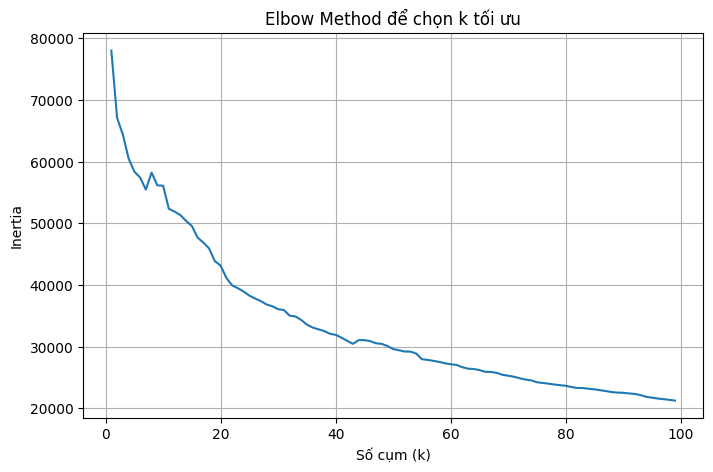

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 100) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_major)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker=None)
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method để chọn k tối ưu')
plt.grid(True)
plt.show()



In [8]:
optimal_k = 20  

n_clusters = optimal_k

kmeans = KMeans(n_clusters, random_state=42)
df['major_cluster'] = kmeans.fit_predict(X_major)

if X_major.shape[1] == 2:
    plt.figure(figsize=(8, 5))
    plt.scatter(X_major[:, 0], X_major[:, 1], c=df['major_cluster'], cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                color='black', marker='x', label='Cluster Centers')
    plt.title(f'KMeans Clustering (k={optimal_k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


In [12]:
for i in range(n_clusters):
    print(f"\n--- Cluster {i} ---")
    print(df[df['major_cluster'] == i]['major'].value_counts().head(5))



--- Cluster 0 ---
major
biology                   1866
molecular biology           24
marine biology              22
biology and psychology      16
biology education           14
Name: count, dtype: int64

--- Cluster 1 ---
major
psychology                    12846
psychology management             2
psychology and management         2
psychology with management        1
psychology it                     1
Name: count, dtype: int64

--- Cluster 2 ---
major
history                925
history education       10
english and history      8
english history          6
history philosophy       4
Name: count, dtype: int64

--- Cluster 3 ---
major
general studies          238
liberal studies          104
international studies     70
communication studies     60
environmental studies     46
Name: count, dtype: int64

--- Cluster 4 ---
major
sociology                     890
psychology and sociology       24
psychology sociology           11
anthropology and sociology      6
sociology and anthro

In [16]:
df = df[~df['major_cluster'].isin([7, 9])]
df.reset_index(drop=True, inplace=True)

print(f"✅ Dataset sau khi lọc: {df.shape[0]} dòng, {df['major_cluster'].nunique()} cluster")
print("📊 Các cluster còn lại:", sorted(df['major_cluster'].unique()))



✅ Dataset sau khi lọc: 77900 dòng, 18 cluster
📊 Các cluster còn lại: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(8), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19)]


In [17]:
for i in range(n_clusters):
    print(f"\n--- Cluster {i} ---")
    print(df[df['major_cluster'] == i]['major'].value_counts().head(5))



--- Cluster 0 ---
major
biology                   1866
molecular biology           24
marine biology              22
biology and psychology      16
biology education           14
Name: count, dtype: int64

--- Cluster 1 ---
major
psychology                    12846
psychology management             2
psychology and management         2
psychology with management        1
psychology it                     1
Name: count, dtype: int64

--- Cluster 2 ---
major
history                925
history education       10
english and history      8
english history          6
history philosophy       4
Name: count, dtype: int64

--- Cluster 3 ---
major
general studies          238
liberal studies          104
international studies     70
communication studies     60
environmental studies     46
Name: count, dtype: int64

--- Cluster 4 ---
major
sociology                     890
psychology and sociology       24
psychology sociology           11
anthropology and sociology      6
sociology and anthro

In [18]:
print(df[['major', 'major_cluster']].head(100))

                         major  major_cluster
0                      nursing             18
1                    education             15
2                   literature             10
3                         math             10
4   family resource management             10
..                         ...            ...
95          mining engineering              8
96                  psychology              1
97                anthropology             10
98                   undecided             10
99                     finance             16

[100 rows x 2 columns]


In [19]:
df = df.drop(columns=['major'])
df.to_csv('../datasets/RIASEC_Dataset_clustered.csv', index=False)